In [1]:
import sys
import numpy as np
import tensorflow as tf
from tensorflow.python.framework import ops
import matplotlib.pyplot as pltq
sys.path.append("../Functions/")
# sys.path.remove("../Functions/")
from getImageArrays import getExamples
import getImageArrays
from importlib import reload

In [2]:
#reloads source files to get most recent edits
import importlib
importlib.reload(getImageArrays)

<module 'getImageArrays' from '../Functions/getImageArrays.py'>

In [3]:
image_path = "../Data/Logistic_Regression_Data/"
num_images = 100
examples_per_batch = 16

In [4]:
train_x, train_y, test_x, test_y = getExamples(side_length=100, image_path=image_path , test_ratio=.2, max_num_images=num_images)
# train_x, train_y, test_x, test_y  = train_x.T, train_y.T, test_x.T, test_y.T
assert((len(train_x) + len(test_x)) == num_images), "Not sufficeint number of images" 

getExamples!
examplesCow (50, 100, 100, 3)
../Data/Logistic_Regression_Data/notcows/ herererer
Invalid shape notcow197.jpg
examplesNotCow (50, 100, 100, 3)
finished getImageArrays!
labels_cow_data (50, 1)
lables_cow (50, 2)
lables_notCow (50, 2)
Examples Before (100, 100, 100, 3)
labels Before (100, 2)
Examples After (100, 100, 100, 3)
labels After (100, 2)


ValueError: cannot reshape array of size 160 into shape (1,80)

In [11]:
def createBatches(x, examples_per_batch):
    final = []
    for i in range(0, len(x), examples_per_batch):
        start = i
        end = start + examples_per_batch
        #creates exclusively
        if end >= len(x):
            return np.array(final)
        final += [x[start:end]]
    return np.array(final)

In [12]:
train_x, train_y = createBatches(train_x, examples_per_batch), createBatches(train_y, examples_per_batch)
test_x, test_y  = createBatches(test_x, examples_per_batch), createBatches(test_y, examples_per_batch)

In [7]:
print("train_x", train_x.shape)
print("train_y", train_y.shape)
print("test_x", test_x.shape)
print("test_y", test_y.shape)

train_x (4, 16, 100, 100, 3)
train_y (4, 16, 1)
test_x (1, 16, 100, 100, 3)
test_y (1, 16, 1)


In [8]:
np.random.seed(1)
train_x = np.random.randn(1080, 64, 64, 3)
train_y = np.random.randn(1080, 6)
test_x = np.random.randn(120, 64, 64, 3)
test_y = np.random.randn(120, 6)

In [13]:
def create_placeholders(width, height, channels, num_output_classes):
    placeholder_x = tf.placeholder(tf.float32, shape=(None, width, height, channels))
    placeholder_y = tf.placeholder(tf.float32, shape=(None, num_output_classes))
    return placeholder_x, placeholder_y

In [24]:
placeholder_x, placeholder_y = create_placeholders(64, 64, 3, 1)
print(placeholder_x)
print(placeholder_y)

Tensor("Placeholder_2:0", shape=(?, 64, 64, 3), dtype=float32)
Tensor("Placeholder_3:0", shape=(?, 1), dtype=float32)


In [15]:
def initialize_params():
    tf.set_random_seed(1)
    #shape = (window_height, window_width, prev_channels, new_channels)
    W1 = tf.get_variable("W1", shape=[4, 4, 3, 8], initializer=tf.contrib.layers.xavier_initializer(seed=0))
    W2 = tf.get_variable("W2", shape=[2, 2, 8, 16], initializer=tf.contrib.layers.xavier_initializer(seed=0))
    #tf takes care of biases
    return {"W1": W1,"W2":W2}

In [33]:
tf.reset_default_graph()
with tf.Session() as sess:
    params = initialize_params()
    initialize = tf.global_variables_initializer()
    sess.run(initialize)
    print(params["W1"].eval()[1, 1, 1])
    print(params["W2"].eval()[1, 1, 1])

[ 0.00131723  0.14176141 -0.04434952  0.09197326  0.14984085 -0.03514394
 -0.06847463  0.05245192]
[-0.08566415  0.17750949  0.11974221  0.16773748 -0.0830943  -0.08058
 -0.00577033 -0.14643836  0.24162132 -0.05857408 -0.19055021  0.1345228
 -0.22779644 -0.1601823  -0.16117483 -0.10286498]


[ 0.00131723  0.14176141 -0.04434952  0.09197326  0.14984085 -0.03514394
 -0.06847463  0.05245192]
[-0.08566415  0.17750949  0.11974221  0.16773748 -0.0830943  -0.08058
 -0.00577033 -0.14643836  0.24162132 -0.05857408 -0.19055021  0.1345228
 -0.22779644 -0.1601823  -0.16117483 -0.10286498]

In [25]:
def foward_propagate(x, params):
    #tf useses params deduce meta data about architecture
    W1 = params["W1"]
    W2 = params["W2"]
    
    # Layer 1: Convolution -> Relu -> Max Pool
    z1 = tf.nn.conv2d(x, W1, strides=[1,1,1,1], padding="SAME")
    a1 = tf.nn.relu(z1)
    p1 = tf.nn.max_pool(a1, ksize=[1, 8, 8, 1], strides=[1, 8, 8, 1], padding="SAME")
    
    # Layer 2: Convolution -> Relu -> Max Pool
    z2 = tf.nn.conv2d(p1, W2, strides=[1,1,1,1], padding="SAME")
    a2 = tf.nn.relu(z2)
    p2 = tf.nn.max_pool(a2, ksize=[1, 4, 4, 1], strides=[1, 4, 4, 1], padding="SAME")
    
    # 
    flatten_cnn_output = tf.contrib.layers.flatten(p2)
    preds = tf.contrib.layers.fully_connected(flatten_cnn_output, 1, activation_fn=None)
    
    return preds    

In [17]:
# np.random.seed(17)
tf.reset_default_graph()
with tf.Session() as sess:
    np.random.seed(1)
    placeholder_x, placeholder_y = create_placeholders(64, 64, 3, 6)
    params = initialize_params()
    preds = foward_propagate(placeholder_x, params)
    initialize = tf.global_variables_initializer()
    sess.run(initialize)
    test = sess.run(preds, {placeholder_x: np.random.randn(2, 64, 64, 3), placeholder_y: np.random.randn(2, 6)})
print(test)

[[ 1.44169843 -0.24909666  5.45049906 -0.26189619 -0.20669907  1.36546707]
 [ 1.40708458 -0.02573211  5.08928013 -0.48669922 -0.40940708  1.26248586]]


[[ 1.44169843 -0.24909666  5.45049906 -0.26189619 -0.20669907  1.36546707]
 [ 1.40708458 -0.02573211  5.08928013 -0.48669922 -0.40940708  1.26248586]]

In [34]:
def cost_op(preds, y):
    costs = tf.nn.softmax_cross_entropy_with_logits(logits=preds, labels=y)
    #gets average
    avg_cost = tf.reduce_mean(costs)
#     avg_cost = tf.abs(avg_cost)
#     costs = tf.abs(costs)
#     avg_cost = tf.reduce_mean(costs)
    print("COSTS", costs)
    print("AVG Cost", avg_cost)
    return avg_cost

In [92]:
# np.random.seed(17)
tf.reset_default_graph()
with tf.Session() as sess:
    np.random.seed(1)
    placeholder_x, placeholder_y = create_placeholders(64, 64, 3, 6)
    params = initialize_params()
    preds = foward_propagate(placeholder_x, params)
    print(preds.shape)
    avg_cost = cost_op(preds, placeholder_y)
    
    initialize = tf.global_variables_initializer()
    sess.run(initialize)
    
    test = sess.run(avg_cost, {placeholder_x: np.random.randn(4, 64, 64, 3), placeholder_y: np.random.randn(4, 6)})
print(test)

(?, 1)


InvalidArgumentError: logits and labels must be same size: logits_size=[4,1] labels_size=[4,6]
	 [[Node: softmax_cross_entropy_with_logits_sg = SoftmaxCrossEntropyWithLogits[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"](softmax_cross_entropy_with_logits_sg/Reshape, softmax_cross_entropy_with_logits_sg/Reshape_1)]]

Caused by op 'softmax_cross_entropy_with_logits_sg', defined at:
  File "/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/anaconda3/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/anaconda3/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-92-227a3e99b644>", line 9, in <module>
    avg_cost = cost_op(preds, placeholder_y)
  File "<ipython-input-91-da74c87ec1e2>", line 2, in cost_op
    costs = tf.nn.softmax_cross_entropy_with_logits(logits=preds, labels=y)
  File "/anaconda3/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py", line 250, in new_func
    return func(*args, **kwargs)
  File "/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/nn_ops.py", line 1960, in softmax_cross_entropy_with_logits
    labels=labels, logits=logits, dim=dim, name=name)
  File "/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/nn_ops.py", line 1875, in softmax_cross_entropy_with_logits_v2
    precise_logits, labels, name=name)
  File "/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gen_nn_ops.py", line 4575, in _softmax_cross_entropy_with_logits
    name=name)
  File "/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3271, in create_op
    op_def=op_def)
  File "/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1650, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): logits and labels must be same size: logits_size=[4,1] labels_size=[4,6]
	 [[Node: softmax_cross_entropy_with_logits_sg = SoftmaxCrossEntropyWithLogits[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"](softmax_cross_entropy_with_logits_sg/Reshape, softmax_cross_entropy_with_logits_sg/Reshape_1)]]


In [35]:
def model(trainX, trainY, testX, testY, epoch, lr, output_num_classes):
    ops.reset_default_graph()
    tf.set_random_seed(17)
    num_batches, num_train_examples , width, height, num_channels = trainX.shape
    _, num_test_examples , _, _, _ = testX.shape
#     output_num_classes = 1
    costs = []
    
    # Conv -> ....
    placeholder_x, placeholder_y = create_placeholders(width, height, num_channels, output_num_classes)
    params = initialize_params()
    preds = foward_propagate(placeholder_x, params)
    spred = (placeholder_y, preds)
    avg_cost = cost_op(preds, placeholder_y)
    optimizer = tf.train.AdamOptimizer(lr).minimize(avg_cost)
    
    initialize = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(initialize)
        
        for i in range(epoch):
                #remember to shuffle batches
            for b in range(num_batches):
    #         mini_batch_cost = 0
    #         num_mini_batches = int(num_train_examples/batch_size)

    #         mini_batch_cost = sess.run(avg_cost, {placeholder_x: np.random.randn(4, 64, 64, 3), placeholder_y: np.random.randn(4, 6)})
    #         costs += mini_batch_cost
    

                cur_cost = sess.run([optimizer, preds, avg_cost, spred], {placeholder_x: trainX[b], placeholder_y: trainY[b]})
#                 print("preds", preds)
                costs += [cur_cost[2]]
                print(cur_cost[2])
#                 print("Spred", cur_cost[3])
    print("costs", costs)
    x = [i for i in range(len(costs))]
    y = costs
    plt.plot(x, y)
    plt.ylabel("cost")
    plt.xlabel("iters")
#     plt.titl
    plt.show()
    
    return sess
#     predict = tf.argmax(preds, 1)
#     true_label = tf.argmax(placeholder_y, 1)
#     correct = tf.equal(predict, true_label)
    
#     accuracy = tf.reduce_mean(tf.cast(correct, "float"))
#     train_acc = accuracy.eval({placeholder_x: trainX, placeholder_y: trainY})
#     test_acc = accuracy.eval({placeholder_x: testX, placeholder_y: testY})
#     print("accuracy", accuracy)
#     print("train_acc", train_acc)
#     print("test_acc", test_acc)
    
#     return train_acc, test_acc, params

In [27]:
print("train_x", train_x.shape)
print("train_y", train_y.shape)
print("test_x", test_x.shape)
print("test_y", test_y.shape)

train_x (4, 16, 100, 100, 3)
train_y (4, 16, 1)
test_x (1, 16, 100, 100, 3)
test_y (1, 16, 1)


In [36]:
sess = model(train_x, train_y, test_x, test_y, 100, .009, 1)

COSTS Tensor("softmax_cross_entropy_with_logits_sg/Reshape_2:0", shape=(?,), dtype=float32)
AVG Cost Tensor("Mean:0", shape=(), dtype=float32)
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0

NameError: name 'plt' is not defined

In [29]:
train_x[0]
io.imshow(image)
io.show()

NameError: name 'io' is not defined

In [82]:
print(train_y)

[[[ 0.]
  [ 1.]
  [ 0.]
  [ 1.]
  [ 0.]
  [ 0.]
  [ 1.]
  [ 0.]
  [ 1.]
  [ 1.]
  [ 0.]
  [ 0.]
  [ 1.]
  [ 1.]
  [ 1.]
  [ 1.]]

 [[ 0.]
  [ 1.]
  [ 1.]
  [ 1.]
  [ 1.]
  [ 0.]
  [ 1.]
  [ 1.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 1.]
  [ 0.]]

 [[ 0.]
  [ 0.]
  [ 1.]
  [ 1.]
  [ 1.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 1.]
  [ 1.]
  [ 1.]
  [ 1.]
  [ 1.]
  [ 0.]
  [ 1.]]

 [[ 1.]
  [ 0.]
  [ 1.]
  [ 0.]
  [ 1.]
  [ 0.]
  [ 1.]
  [ 1.]
  [ 0.]
  [ 1.]
  [ 0.]
  [ 1.]
  [ 0.]
  [ 1.]
  [ 0.]
  [ 0.]]]


In [117]:
np.random.seed(1)
train_x = np.random.randn(10, 8, 64, 64, 3)
train_y = np.random.randn(10, 8, 6)
test_x = np.random.randn(1, 8, 64, 64, 3)
test_y = np.random.randn(1, 8, 6)

COSTS Tensor("softmax_cross_entropy_with_logits_sg/Reshape_2:0", shape=(?,), dtype=float32)
AVG Cost Tensor("Abs:0", shape=(), dtype=float32)
1.93638
1.09742
1.01556
0.204884
0.869969
1.12248
0.910373
0.437463
0.173371
0.374781
0.31776
0.0714213
0.301828
0.446378
0.396021
0.203948
0.0971293
0.19409
0.13298
0.0462463
0.0662698
0.0525473
0.0197881
0.139259
0.147446
0.0255024
0.208509
0.285835
0.228433
0.0507258
0.235005
0.346758
0.314604
0.168059
0.0603177
0.153287
0.125585
0.00673005
0.0182672
0.0681732
0.050814
0.0568752
0.0549302
0.037933
0.0291871
0.0668422
0.0632946
0.0254475
0.0186746
0.0705015
0.0662523
0.0199541
0.0137741
0.073988
0.0703339
0.0135562
0.00774989
0.0779845
0.0745328
0.00913841
0.00285587
0.0830898
0.0803528
0.00585818
0.141215
0.174903
0.126001
0.00667807
0.175752
0.245016
0.22415
0.127369
0.033618
0.098535
0.0781317
0.0179264
0.0267347
0.0411265
0.0260264
0.0612791
0.0644721
0.00655571
0.00339434
0.0604662
0.0442313
0.0414114
0.0465446
0.0193615
0.00836799
0.07281

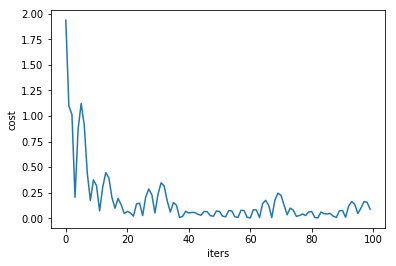

In [121]:
tf.reset_default_graph()
sess = model(train_x, train_y, test_x, test_y, 100, .009, 6)